# `StratifiedGOAnalysis` class
- this class undertakes analyses related to GO
- this class calls wrapper functions (`gprofiler` and `get_go` in `tools/_go.py`) that calls R pkgs such as `AnnotationDBi` and `gprofiler2` from python env (See **Appendix** for details).

In [1]:
from tools import StratifiedGOAnalysis as SGOA

## Documentation
### 1. `__init__`
- arguments
    - `data`: [`SuematsuData`](https://takemura-hgf.readthedocs.io/en/latest/jupyternb/suematsudata.html)
    - `d`: float (default:0.8)
        - argument in [`gene_selection`](https://takemura-hgf.readthedocs.io/en/latest/jupyternb/cohens_d.html)
    - `palettes`: tuple: (default:("plasma", "viridis"))
        - tuple of `pallete` arguments in `seaborn.scatterplot`
        - pass (PALLETE_NAME_FOR_UPREGULATED_GENES, PALLETE_NAME_FOR_DOWNREGULATEDGENES)
        - e.g., default value indicates "plasma" is used for upregulated genes and "viridis" is used for downregulated genes
        - **Note**: preset argument for longitudinal comparoson ([`sgoa_longitudinal_args`](https://takemura-hgf.readthedocs.io/en/latest/jupyternb/preference.html)) over writes this to ("magma", "cividis")
    - `out`: str (default:"/home/jovyan/out")
        - dirname for exporting output files
    - `split_by_days`: bool (default:False)
        - pass True for longitudinal comparison
    - `adgile`: bool (default:False)
        - argument for `pipeline` function
        - pass True to skip analyses for existing output files
- instance variables
    - `out`: str
    - `split_by_days`: bool
        - these variables corresponds to respective arguments
    - `data`: dict
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - results of `gene_selection` will be restructured into dict
    - `palette`: dict
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - `{"up": palettes[0], "down": palettes[1]}` will be stored referring `palettes` argument
    - `venn3_palette`: str
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - "palette1" if `split_by_days` is True, otherwise "palette2"
    - `barplot_palette`: tuple
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - ("C1", "C2", "C0") if `split_by_days` is True, otherwise ("y", "grey", "m")
    - `title`: dict
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - actual value will be like this:
            ```python
            {v: f"{v}regulated GO tems {'through time course' if split_by_days else 'by HGF'}" for v in ["up", "down"]}
            ```
    - `results`: dict
        - optional variable generated if there are more than one functions to be executed (taken account when `adgile=True`)
        - results of `gprofiler` will be stored based in the structure of `data`
- return: None
- output: N/A

In [2]:
from tools import SuematsuData, sgoa_longitudinal_args

In [3]:
sgoa1 = SGOA(data=SuematsuData(), **sgoa_longitudinal_args)

print(f"""
sgoa1.out: {sgoa1.out}\n
sgoa1.split_by_days: {sgoa1.split_by_days}\n
sgoa1.data: {"{'" + ", '".join([k + "': {'" + ", '".join([kk + "': ..." for kk in d.keys()]) + "}" for k, d in sgoa1.data.items()]) + "}"}\n
sgoa1.palette: {sgoa1.palette}\n
sgoa1.venn3_palette: {sgoa1.venn3_palette}\n
sgoa1.barplot_palette: {sgoa1.barplot_palette}\n
sgoa1.title: {sgoa1.title}\n
sgoa1.result: {"{'" + ", '".join([k + "': {'" + ", '".join([kk + "': ..." for kk in d.keys()]) + "}" for k, d in sgoa1.result.items()]) + "}"}\n
""")


sgoa1.out: /home/jovyan/out

sgoa1.split_by_days: True

sgoa1.data: {'up': {'HGF+': ..., 'com.': ..., 'control': ...}, 'down': {'HGF+': ..., 'com.': ..., 'control': ...}}

sgoa1.palette: {'up': 'magma', 'down': 'cividis'}

sgoa1.venn3_palette: palette1

sgoa1.barplot_palette: ('C1', 'C2', 'C0')

sgoa1.title: {'up': 'upregulated GO terms through time course', 'down': 'downregulated GO terms through time course'}

sgoa1.result: {'up': {'HGF+': ..., 'com.': ..., 'control': ...}, 'down': {'HGF+': ..., 'com.': ..., 'control': ...}}




### 2. `enrichment_analysis` and `silent_enrichment_analysis`
- arguments
    - `figsize`: tuple (default:None)
    - `top`: int (default:30)
        - number of top significant GO terms to display 
- return: None
- output: generates figures in the designated directory
    - file names will be as following:
        ```python
        (lambda x, y: x + y)(*([f"go_{k}_{kk.replace('.', '')}.png" for kk in d.keys()] for k, d in sgoa1.result.items()))
        ```
- **Note**: `silent_enrichment_analysis` runs the exact same codes as `enrichment_analysis` but it does not display the images

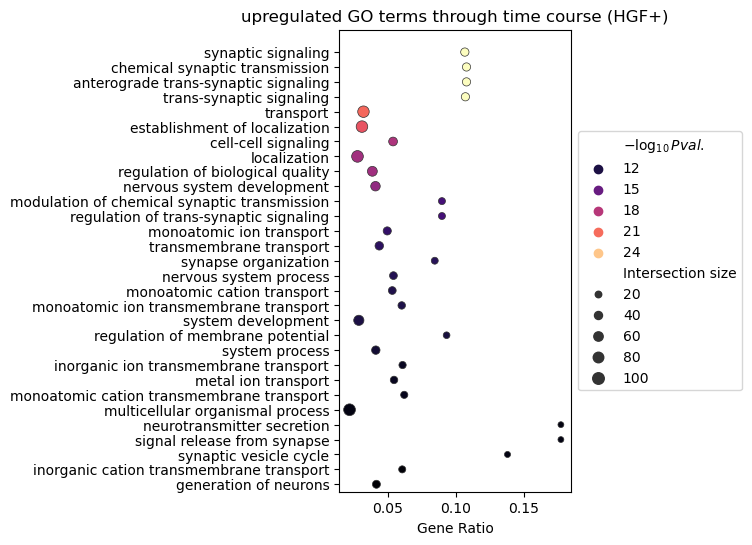

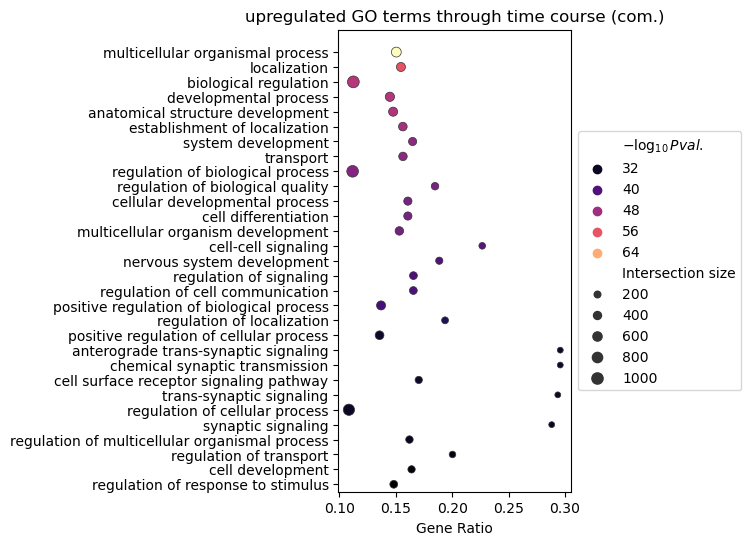

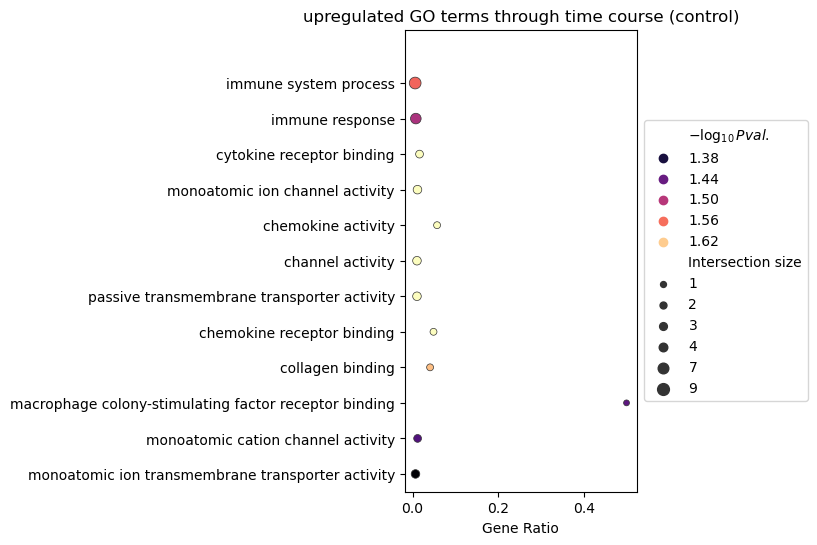

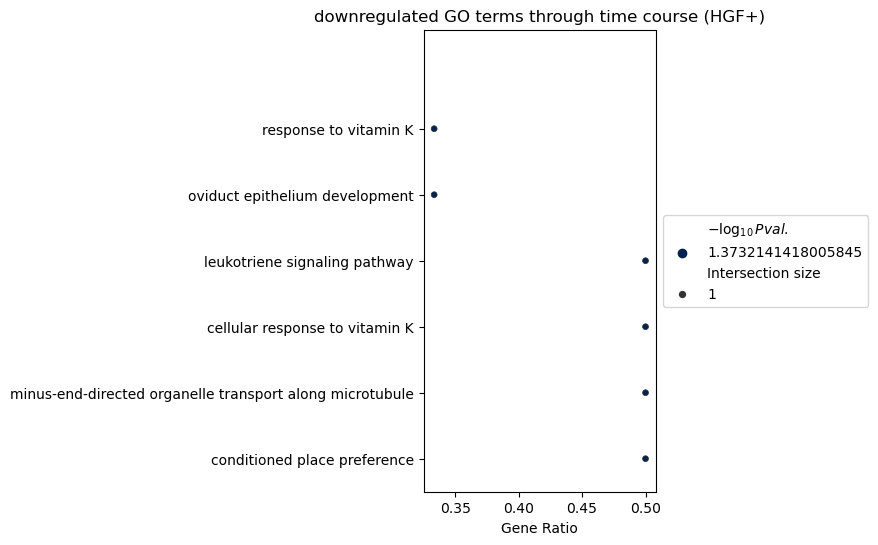

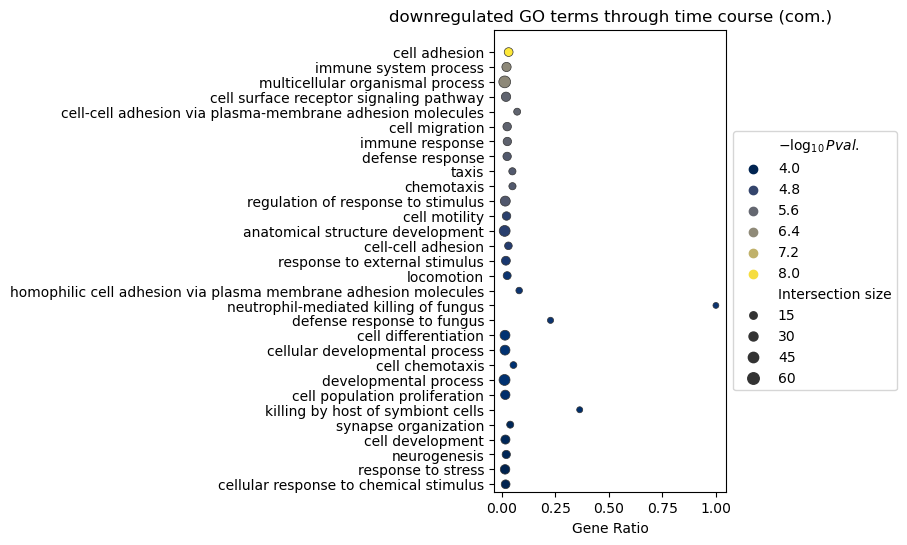

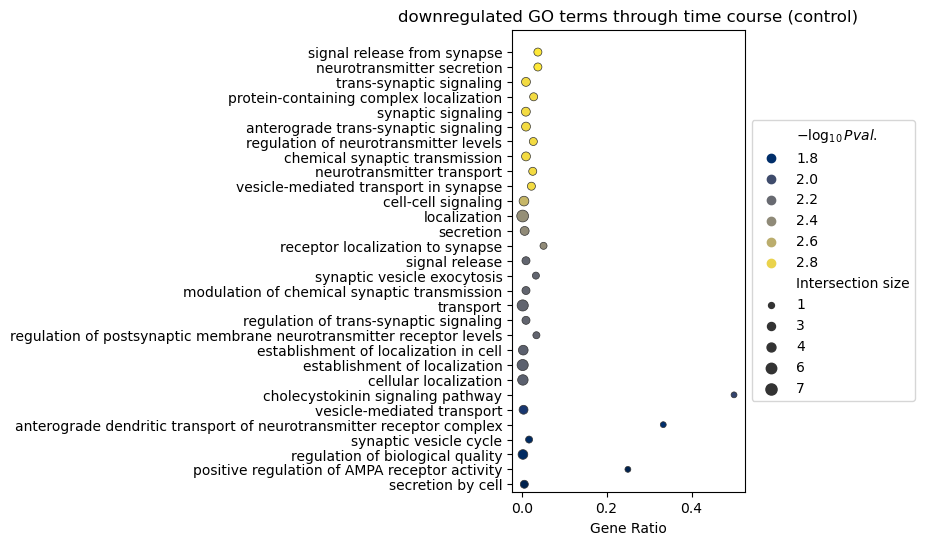

In [4]:
sgoa1.enrichment_analysis()

### 3. `go_venn`
- arguments
    - `layout`: tuple (default:(1, 2))
    - `figsize`: tuple (default:(6, 3))
        - arguments for `matplotlib.pyplot.subplots`
        - equivalent to `matplotlib.pyplot.subplots(*layout, figsize=figsize)`
- return: None
- output: generates figures in the designated directory
    - file names will be as following:
        ```python
        [f"go_venn_all_{'_'.join([kk for kk in d.keys()][::2])}" for k, d in sgoa1.result.items()]
        ```

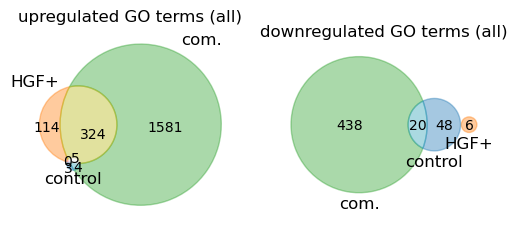

In [5]:
sgoa1.go_venn()

### 4. `top_go_venn`
- arguments
    - `layout`: tuple (default:(1, 2))
    - `figsize`: tuple (default:(6, 3))
        - arguments for `matplotlib.pyplot.subplots`
        - equivalent to `matplotlib.pyplot.subplots(*layout, figsize=figsize)`
    - `top`: int (default:30)
        - number of top significant GO terms to display 
- return: None
- output: generates figures in the designated directory
    - file names will be as following when `top = 30`:
        ```python
        [f"go_venn_top30_{'_'.join([kk for kk in d.keys()][::2])}" for k, d in sgoa1.result.items()]
        ```

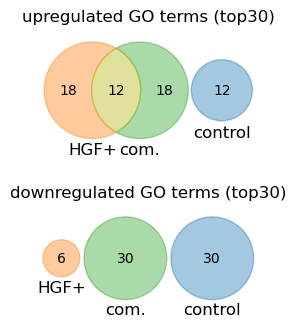

In [6]:
sgoa1.top_go_venn(layout=(2, 1), figsize=(3, 4), top=30)

### 5. `go2gene_barplot` and `silent_go2gene_barplot`
- arguments
    - `top`: int (default:30)
        - number of top significant GO terms to display
        - pass None for all genes (`top` will be set to 100000, which is larger than the number of genes in human or mouse)
    - `filter_id`: int (default: 111)
        - locations in venn diagrams of GO terms to visualize the number of genes in the venn diagram of upregulated/downregulated genes
        - the positional arguments are inherited from [`matplotlib_venn.venn3`](https://pypi.org/project/matplotlib-venn/)
        - A, B, C: sets,
            - A $\setminus$ (A $\cap$ (B $\cup$ C)) ("100" in `matplotlib_venn.venn3`) $\rightarrow$ 100
            - B $\setminus$ (B $\cap$ (C $\cup$ A)) ("010" in `matplotlib_venn.venn3`) $\rightarrow$ 10
            - C $\setminus$ (C $\cap$ (A $\cup$ B)) ("001" in `matplotlib_venn.venn3`) $\rightarrow$ 1
            - (A $\cap$ B) $\setminus$ (A $\cap$ B $\cap$ C) ("110" in `matplotlib_venn.venn3`) $\rightarrow$ 110
            - (B $\cap$ C) $\setminus$ (B $\cap$ C $\cap$ A) ("011" in `matplotlib_venn.venn3`) $\rightarrow$ 011
            - (C $\cap$ A) $\setminus$ (C $\cap$ A $\cap$ B) ("101" in `matplotlib_venn.venn3`) $\rightarrow$ 101
            - A $\cap$ B $\cap$ C ("111" in `matplotlib_venn.venn3`) $\rightarrow$ 111
        - **Note**: default value is overwritten to 10 in longitudinal comparison (when `sgoa1.split_by_days == True`)
    - `plotsize`: float (default: 3)
    - `wspace`: float (default: 0.3)
    - `hspace`: float (default: 0.3)
        - `plotsize` is the size of a square subplot while `wspace` and `hspace` are arguments for `matplotlib.pyplot.Figure.subplots_adjust`
        - `plotsize` does not directly assign `figsize` of `matplotlib.pyplot.subplots` because `go2gene_barplot` and `silent_go2gene_barplot` automatically determines the layout of the subplots depending on the number of genes
        - when `n_cols` is the number of columns and `n_rows` is the number of rows, `go2gene_barplot` and `silent_go2gene_barplot` runs the following code inside:
            ```python
            fig, ax = matplotlib.pyplot.subplots(n_rows, n_cols, figsize=(plotsize * n_cols, plotsize * n_rows))
            fig.subplots_adjust(wspace=wspace, hspace=hspace)
            ```
- return: None
- output: generates figures in the designated directory
    - file names will be as following when `filter_id == 111` and `top == 30`:
        ```python
        [f"go_barplot_{k}_111_top30_{'_'.join(list(d.keys())[::2])}" for k, d in sgoa1.result.items()]
        ```
    - and when `filter_id == 111` and `top == None`:
        ```python
        [f"go_barplot_{k}_111_all_{'_'.join(list(d.keys())[::2])}" for k, d in sgoa1.result.items()]
        ```
- **Note**: `silent_go2gene_barplot` runs the exact same codes as `go2gene_barplot` but it does not display the images

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


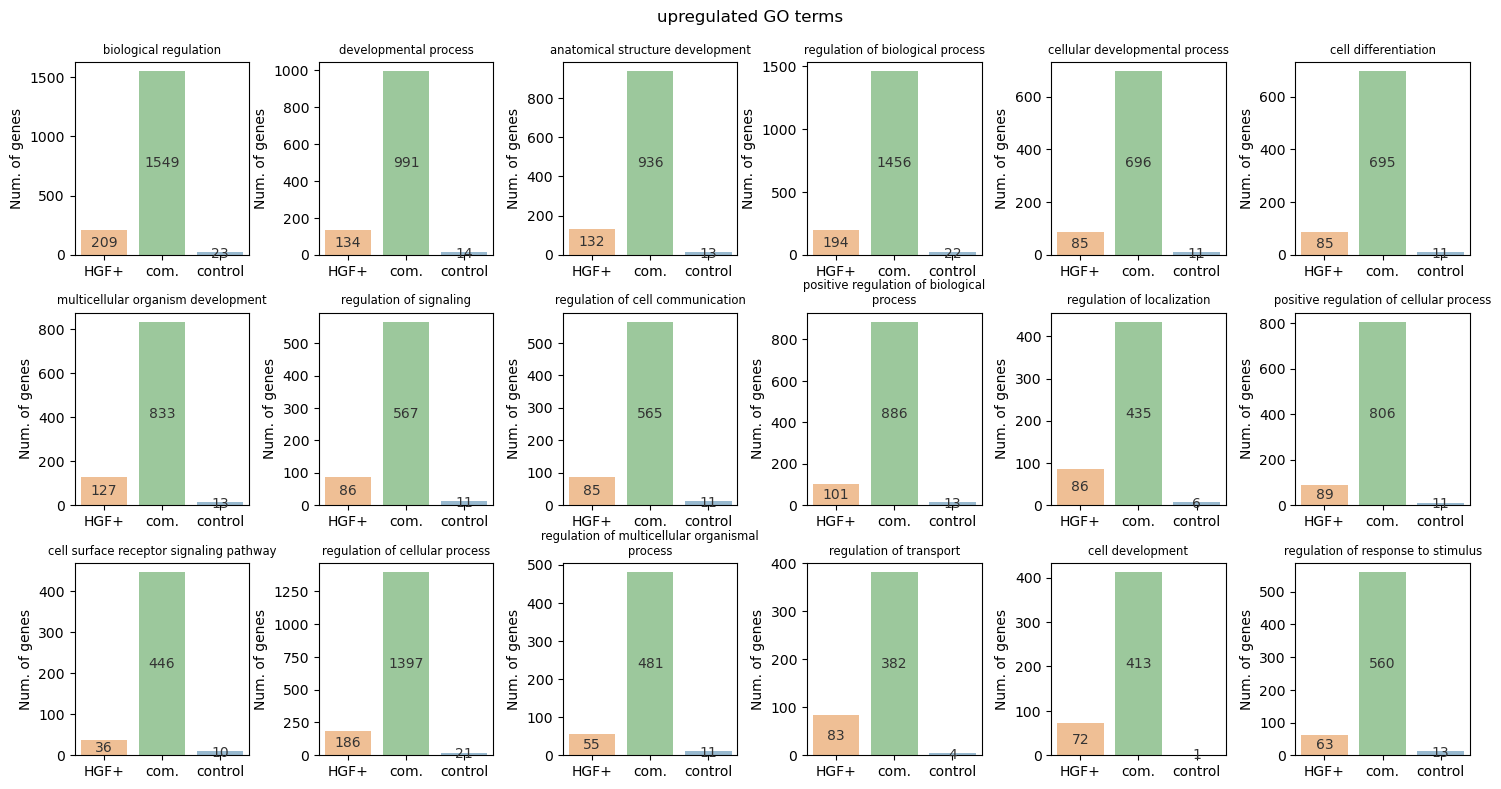

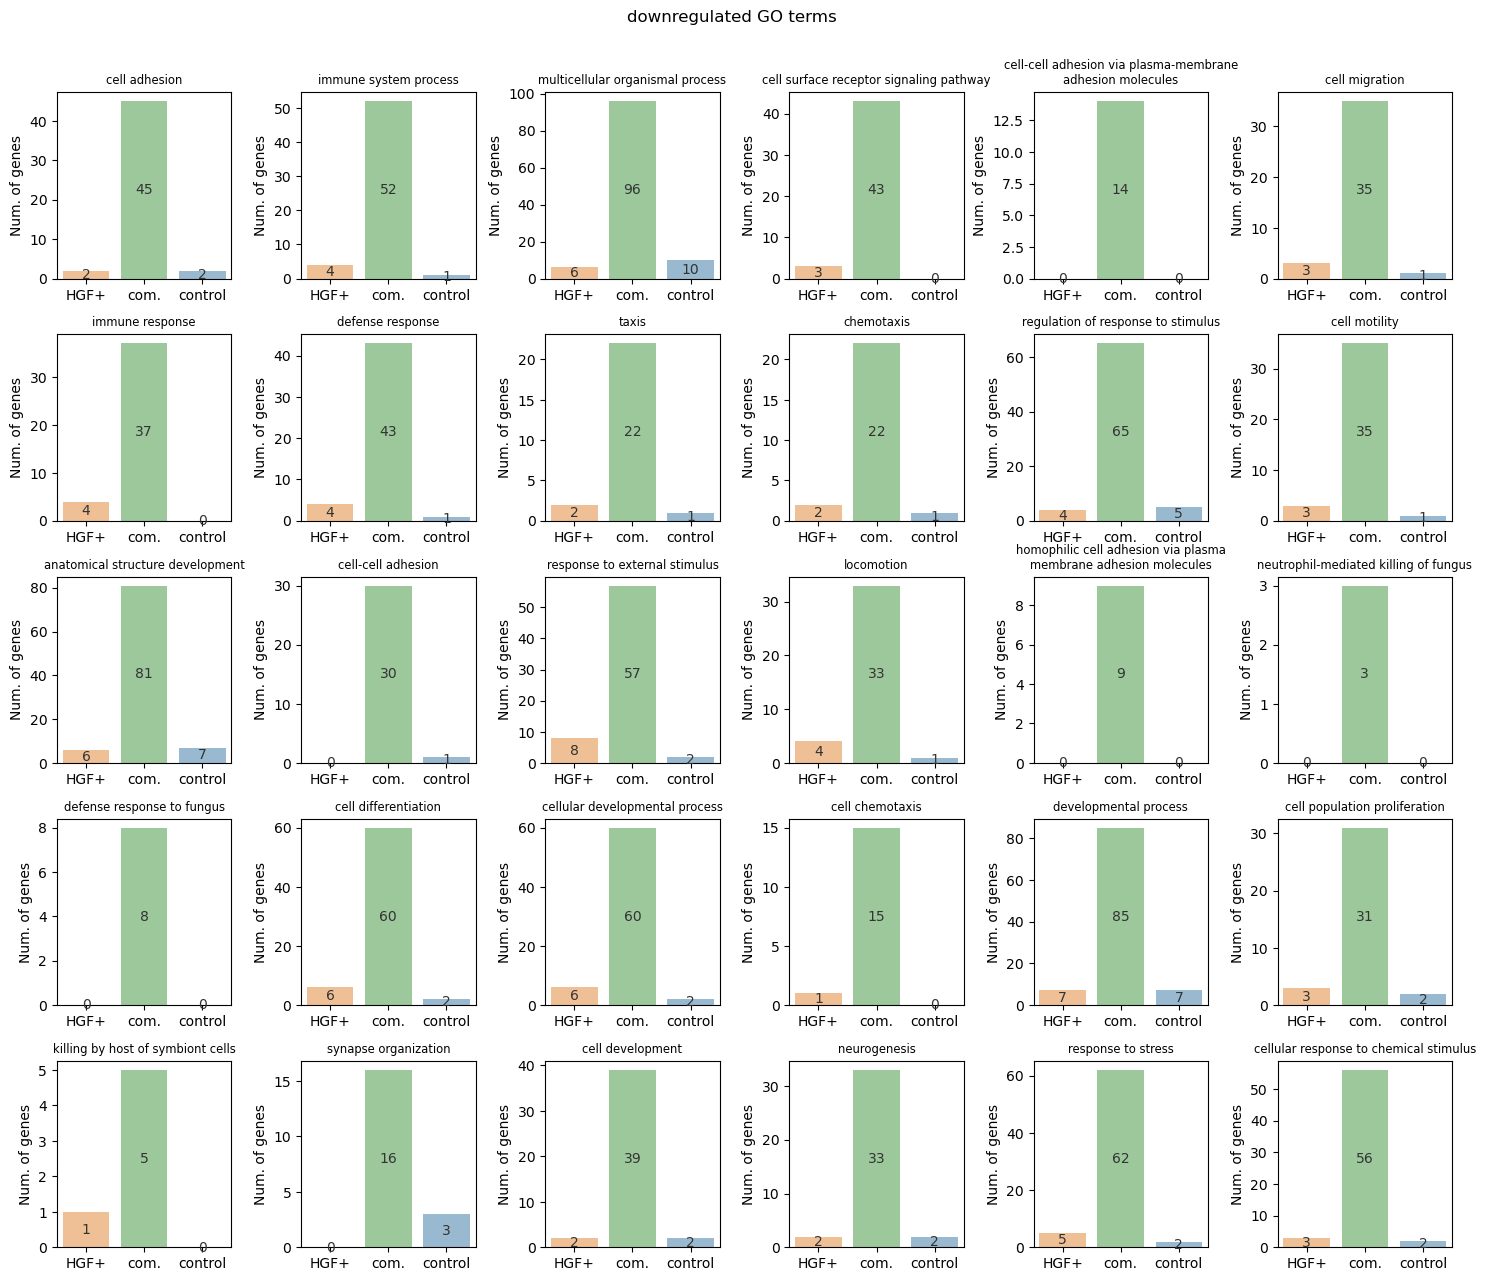

In [7]:
sgoa1.go2gene_barplot(top=30, filter_id=111)

### 6. `pipeline`
- arguments
    - pipe: list (default:[`sgoa_pipeline_adgile.keys()`](https://takemura-hgf.readthedocs.io/en/latest/jupyternb/preference.html))
        - name of functins to call in the pipeline
        - **Note**: for speeding up `metapipeline` func, `silent_enrichment_analysis` and `silent_go2gene_barplot` are called
    - close: bool (default:False)
        - pass True to close generated imgs
    - adgile: bool (default:False)
        - pass True to skip analyses for existing output files
- return: `None`
- output: generates output img files in the designated directory

In [8]:
from tempfile import TemporaryDirectory
import glob

# set temporary directory for comparison
tempdir = TemporaryDirectory()

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


1min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


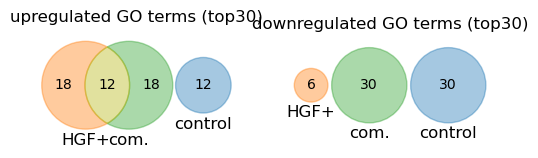

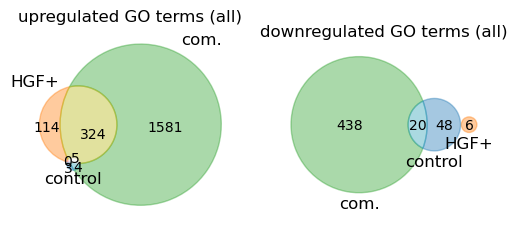

In [9]:
%%timeit -n 1 -r 1

# condition 1: pipeline without adgile mode
sgoa = SGOA(data=SuematsuData(), out=tempdir.name, **sgoa_longitudinal_args)
sgoa.pipeline(close=False)

In [10]:
# checking generated files

print(glob.glob(f"{tempdir.name}/*"))

['/tmp/tmpmner4ms2/go_up_HGF+.png', '/tmp/tmpmner4ms2/go_up_com.png', '/tmp/tmpmner4ms2/go_down_HGF+.png', '/tmp/tmpmner4ms2/go_barplot_down_10_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_up_control.png', '/tmp/tmpmner4ms2/go_venn_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_down_com.png', '/tmp/tmpmner4ms2/go_barplot_up_10_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_down_control.png', '/tmp/tmpmner4ms2/go_venn_all_HGF+_control.png']


In [11]:
%%timeit -n 1 -r 1

# condition 2: pipeline with adgile mode
sgoa = SGOA(data=SuematsuData(), out=tempdir.name, adgile=True, **sgoa_longitudinal_args)
sgoa.pipeline(close=True, adgile=True)

7.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
# checking generated files

print(glob.glob(f"{tempdir.name}/*"))
tempdir.cleanup()

['/tmp/tmpmner4ms2/go_up_HGF+.png', '/tmp/tmpmner4ms2/go_up_com.png', '/tmp/tmpmner4ms2/go_down_HGF+.png', '/tmp/tmpmner4ms2/go_barplot_down_10_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_up_control.png', '/tmp/tmpmner4ms2/go_venn_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_down_com.png', '/tmp/tmpmner4ms2/go_barplot_up_10_top30_HGF+_control.png', '/tmp/tmpmner4ms2/go_down_control.png', '/tmp/tmpmner4ms2/go_venn_all_HGF+_control.png']


## Example: Cross-sectional Comparison
### 1. `__init__`

In [13]:
sgoa2 = SGOA(data=SuematsuData())

print(f"""
sgoa2.out: {sgoa2.out}\n
sgoa2.split_by_days: {sgoa2.split_by_days}\n
sgoa2.data: {"{'" + ", '".join([k + "': {'" + ", '".join([kk + "': ..." for kk in d.keys()]) + "}" for k, d in sgoa2.data.items()]) + "}"}\n
sgoa2.palette: {sgoa2.palette}\n
sgoa2.venn3_palette: {sgoa2.venn3_palette}\n
sgoa2.barplot_palette: {sgoa2.barplot_palette}\n
sgoa2.title: {sgoa2.title}\n
sgoa2.result: {"{'" + ", '".join([k + "': {'" + ", '".join([kk + "': ..." for kk in d.keys()]) + "}" for k, d in sgoa2.result.items()]) + "}"}\n
""")


sgoa2.out: /home/jovyan/out

sgoa2.split_by_days: False

sgoa2.data: {'up': {'day2': ..., 'Const.': ..., 'day7': ...}, 'down': {'day2': ..., 'Const.': ..., 'day7': ...}}

sgoa2.palette: {'up': 'plasma', 'down': 'viridis'}

sgoa2.venn3_palette: palette2

sgoa2.barplot_palette: ('y', 'grey', 'm')

sgoa2.title: {'up': 'upregulated GO terms by HGF', 'down': 'downregulated GO terms by HGF'}

sgoa2.result: {'up': {'day2': ..., 'Const.': ..., 'day7': ...}, 'down': {'day2': ..., 'Const.': ..., 'day7': ...}}




### 2. `enrichment_analysis`

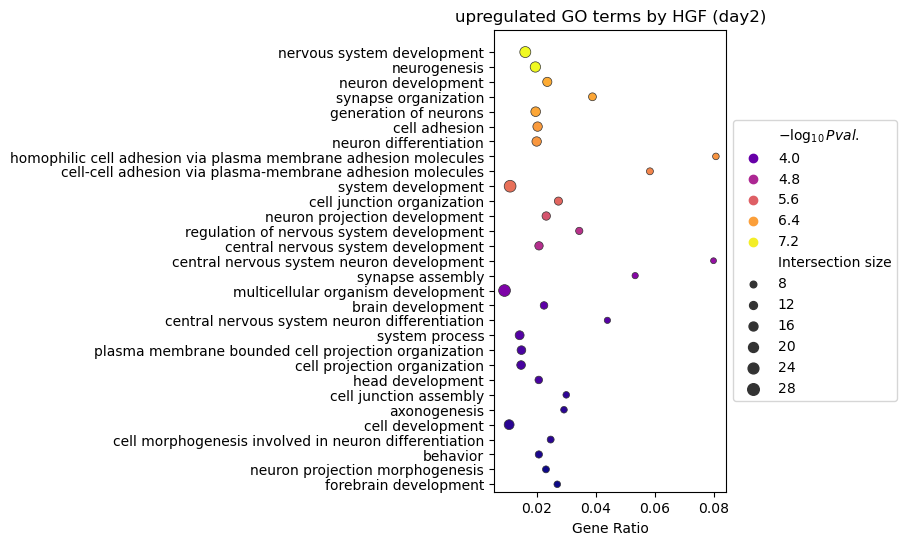

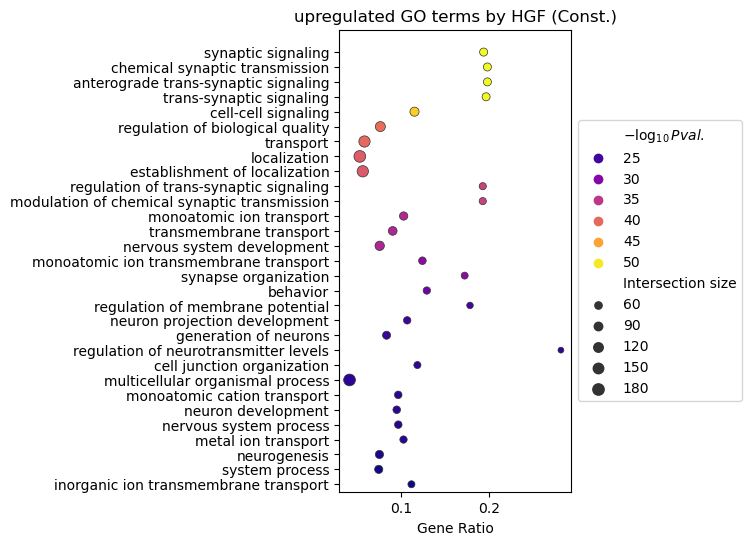

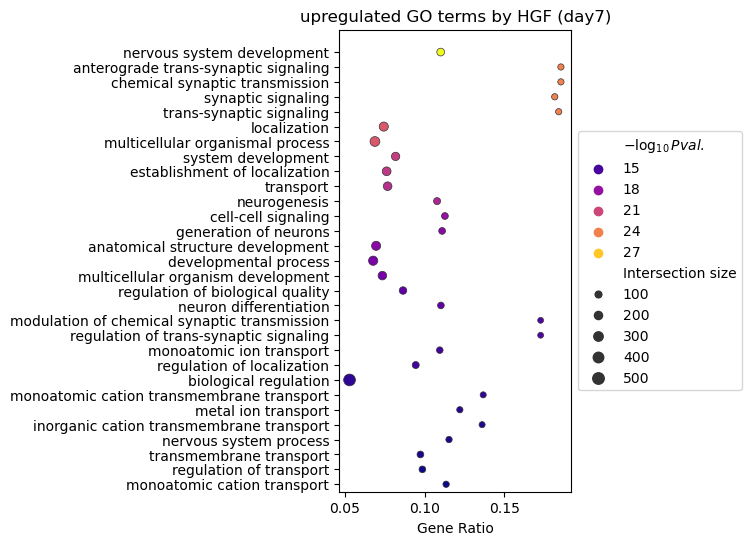

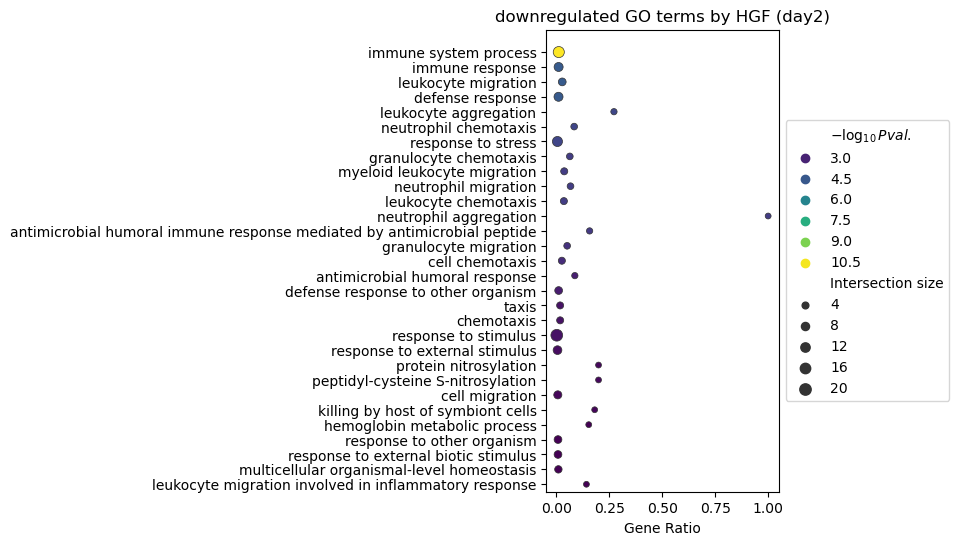

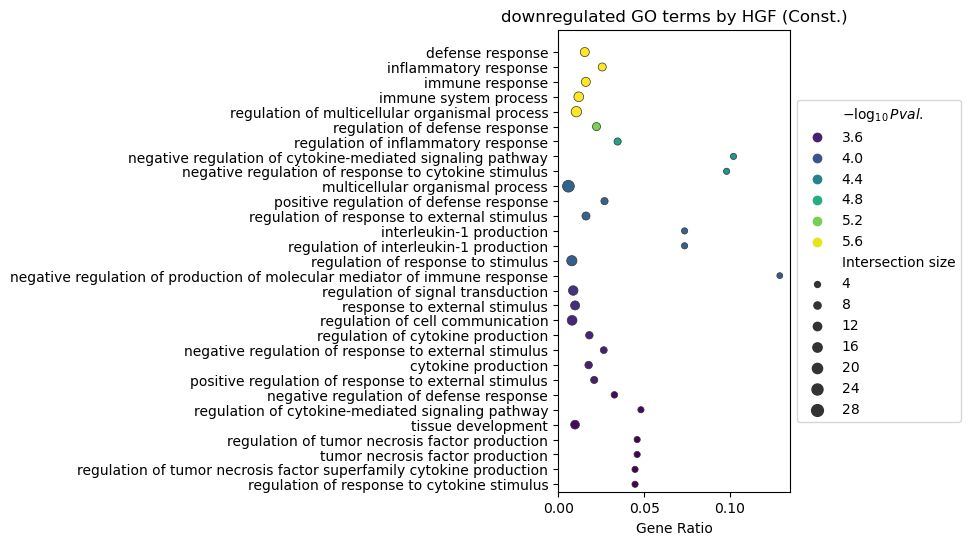

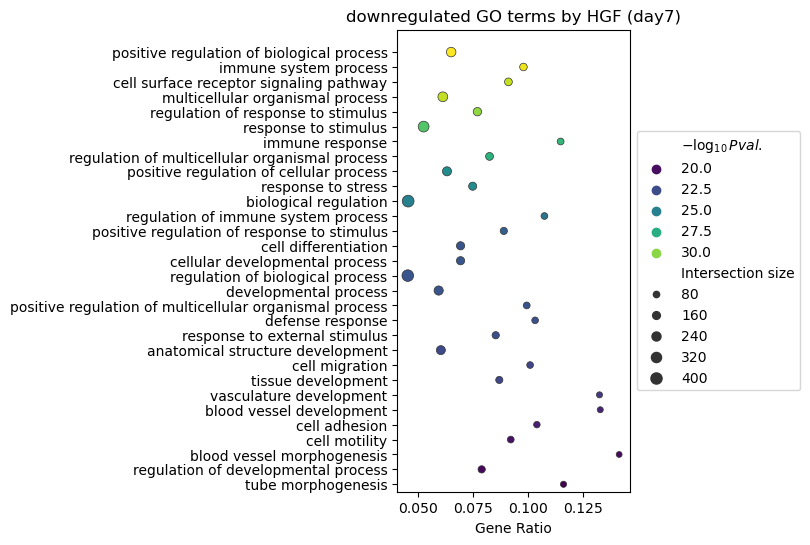

In [14]:
sgoa2.enrichment_analysis()

### 3. `go_venn`

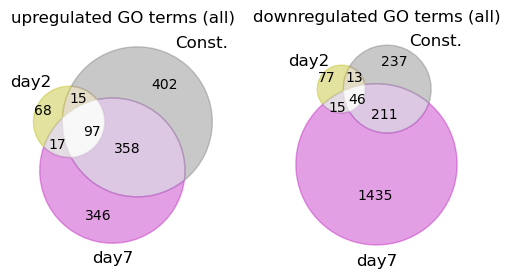

In [15]:
sgoa2.go_venn()

### 4. `top_go_venn`

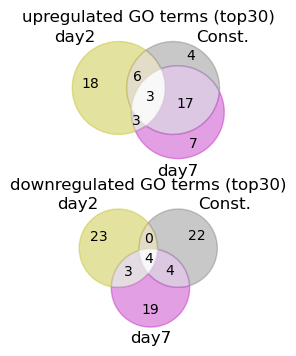

In [16]:
sgoa2.top_go_venn(top=30, layout=(2, 1), figsize=(3, 4))

### 5. `go2gene_barplot`

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


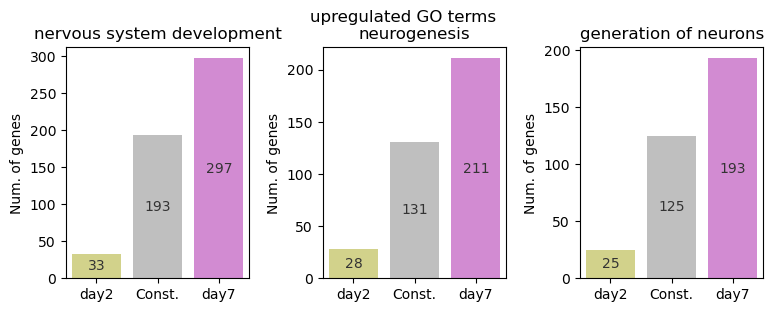

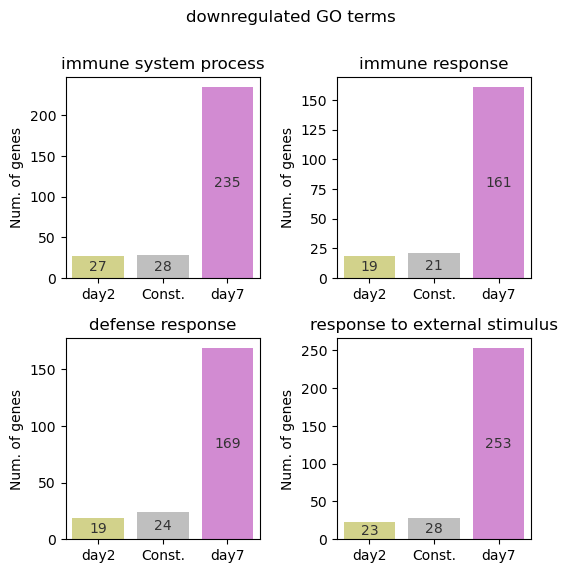

In [17]:
sgoa2.go2gene_barplot(top=30, filter_id=111, suptitle_y=.98)

### 6. `pipeline`

In [18]:
# set temporary directory for comparison
tempdir = TemporaryDirectory()

'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


1min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


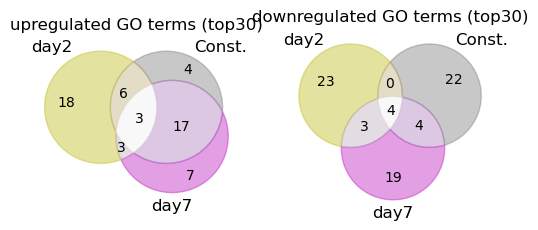

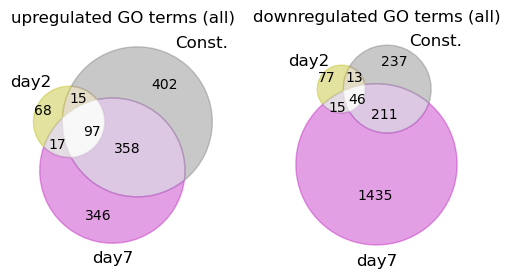

In [19]:
%%timeit -n 1 -r 1

# condition 1: pipeline without adgile mode
sgoa = SGOA(data=SuematsuData(), out=tempdir.name)
sgoa.pipeline(close=False)

In [20]:
# checking generated files

print(glob.glob(f"{tempdir.name}/*"))

['/tmp/tmpc6fweolk/go_up_Const.png', '/tmp/tmpc6fweolk/go_barplot_down_111_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_venn_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_down_Const.png', '/tmp/tmpc6fweolk/go_up_day2.png', '/tmp/tmpc6fweolk/go_barplot_up_111_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_venn_all_day2_day7.png', '/tmp/tmpc6fweolk/go_down_day7.png', '/tmp/tmpc6fweolk/go_up_day7.png', '/tmp/tmpc6fweolk/go_down_day2.png']


In [21]:
%%timeit -n 1 -r 1

# condition 2: pipeline with adgile mode
sgoa = SGOA(data=SuematsuData(), out=tempdir.name, adgile=True)
sgoa.pipeline(close=True, adgile=True)

9.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
# checking generated files

print(glob.glob(f"{tempdir.name}/*"))
tempdir.cleanup()

['/tmp/tmpc6fweolk/go_up_Const.png', '/tmp/tmpc6fweolk/go_barplot_down_111_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_venn_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_down_Const.png', '/tmp/tmpc6fweolk/go_up_day2.png', '/tmp/tmpc6fweolk/go_barplot_up_111_top30_day2_day7.png', '/tmp/tmpc6fweolk/go_venn_all_day2_day7.png', '/tmp/tmpc6fweolk/go_down_day7.png', '/tmp/tmpc6fweolk/go_up_day7.png', '/tmp/tmpc6fweolk/go_down_day2.png']


## Appendix: Interaction of Python and R
- we designed our system as the following so that we can have access to R pkgs from python:
    1. create temporary directory using `tempfile.TemporaryDirectory` and export data files there
    2. execute R scripts (`tools/_gprofiler_pipeline.R` or `_get_go.R`) using `subprocess.call`
    3. those R scripts calls R functions loaded from `tools/_gprofiler.R` or `_go.R` that can conduct GO-related analysis
    4. export results in the temporary directory
    5. load results into python env
    6. delete the temporary directory